# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%load_ext autoreload
%autoreload 2
%matplotlib inline

from math import sqrt
import matplotlib.pyplot as plt
import mythinkstats as mts
import numpy as np
import pandas as pd
import random
import scipy.stats
from scipy.stats import norm, skewnorm

print('Ready')

Ready


## Properties of the Normal Distribution

**Closed under linear transformation**

A linear transformation of $X$ is $X' = aX + b$. A distrubition is closed under linear transformation if $X'$ is in the same family of distributions as $X$. In this case, if $X \sim N(\mu, \sigma^2)$, then $X' \sim N(a\mu + b, a^2\sigma^2)$. 

**Closed under addition**

If $Z = X + Y$ where $X \sim N(\mu_X, \sigma_X^2)$ and $Y \sim N(\mu_X, \sigma_X^2)$, then $Z \sim N(\mu_X + \mu_Y, \sigma_X^2 + \sigma_Y^2)$

If we have $n$ values of $X$ and add them up, we get $Z \sim N(n\mu_X, n\sigma_X^2)$.


Show both of these below with simulation.




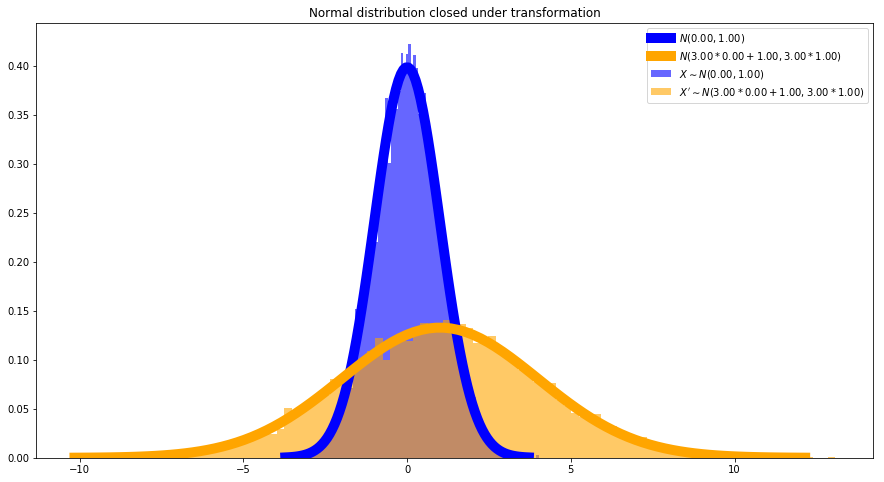

In [2]:
# Normal distribution closed under transformation.
plt.figure(figsize=(15, 8))
np.random.seed(1)
n = 10000

# Generate a random sample with a specific mu and sigma.
mu = 0
sigma = 1
X = np.random.normal(mu, sigma, n)

# Plot the distribution and the sample.
x = np.linspace(scipy.stats.norm.ppf(1e-4, mu, sigma), scipy.stats.norm.ppf(1 - 1e-4, mu, sigma), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), linewidth=10, label='$N(%.2lf, %.2lf)$' % (mu, sigma), color='blue')
plt.hist(X, label='$X \sim N(%.2lf, %.2lf)$' % (mu, sigma), bins=100, 
         density=True, color='blue', alpha=0.6)


# Apply a linear transformation to X.
a, b = 3, 1
X_ = a * X + b

# Plot the linearly-transformed X and the corresponding distribution.
mu_ = a * mu + b
sigma_ = a * sigma
x = np.linspace(scipy.stats.norm.ppf(1e-4, mu_, sigma_), scipy.stats.norm.ppf(1 - 1e-4, mu_, sigma_), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu_, sigma_), linewidth=10, 
         label='$N(%.2lf * %.2lf + %.2lf, %.2lf * %.2lf)$' % (a, mu, b, a, sigma), color='orange')
plt.hist(X_, bins=100, density=True, color='orange', alpha=0.6,
         label="$X' \sim N(%.2lf * %.2lf + %.2lf, %.2lf * %.2lf)$" % (a, mu, b, a, sigma))

plt.title('Normal distribution closed under transformation')
plt.legend()
plt.show()

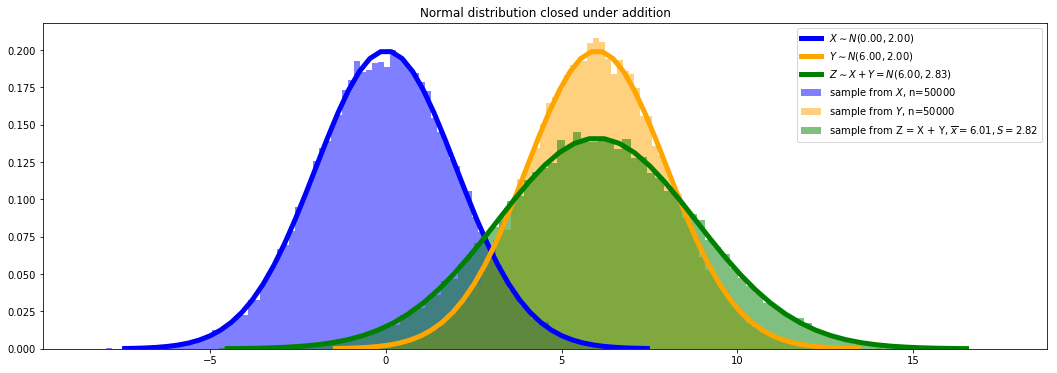

In [3]:
# Normal distribution closed under addition (Z = X + Y).
plt.figure(figsize=(18, 6))
n = 50000
mu_X, sigma_X = 0, 2
mu_Y, sigma_Y = 6, 2
mu_Z = mu_X + mu_Y
sigma_Z = np.sqrt(sigma_X**2 + sigma_Y**2) # Square root of the squared sigmas.

# Plot the sample and PDF of X.
x = np.linspace(norm.ppf(1e-4, mu_X, sigma_X), norm.ppf(1 - 1e-4, mu_X, sigma_X))
plt.plot(x, norm.pdf(x, mu_X, sigma_X), linewidth=5, color='blue',
         label="$X \sim N(%.2lf, %.2lf)$" % (mu_X, sigma_X))
X = norm.rvs(mu_X, sigma_X, n)
plt.hist(X, label='sample from $X$, n=%d' % n, alpha=0.5, density=True, color='blue', bins=100)

# Plot the sample and PDF of Y.
x = np.linspace(norm.ppf(1e-4, mu_Y, sigma_Y), norm.ppf(1 - 1e-4, mu_Y, sigma_Y))
plt.plot(x, norm.pdf(x, mu_Y, sigma_Y), linewidth=5, color='orange',
         label="$Y \sim N(%.2lf, %.2lf)$" % (mu_Y, sigma_Y))
Y = norm.rvs(mu_Y, sigma_Y, n)
plt.hist(Y, label='sample from $Y$, n=%d' % n, alpha=0.5, density=True, color='orange', bins=100)

# Plot the sample and PDF of Z = X + Y.
x = np.linspace(norm.ppf(1e-4, mu_Z, sigma_Z), norm.ppf(1 - 1e-4, mu_Z, sigma_Z))
plt.plot(x, norm.pdf(x, mu_Z, sigma_Z), linewidth=5, color='green',
         label="$Z \sim X + Y = N(%.2lf, %.2lf)$" % (mu_Z, sigma_Z))
Z = X + Y
plt.hist(X + Y, label='sample from Z = X + Y, $\overline{x}=%.2lf, S=%.2lf$' % (Z.mean(), Z.std()), alpha=0.5, density=True, color='green', bins=100)

plt.title('Normal distribution closed under addition')
plt.legend()
plt.show()

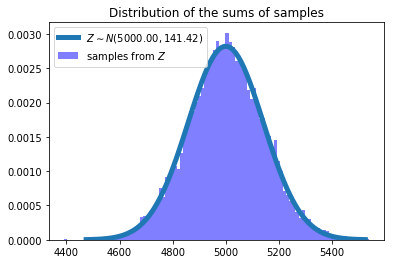

In [4]:
# If we draw n values from X and add them up, we get Z ~ N(n*\mu_X, n*\sigma_X^2).
# Distribution of the sums of samples from X.
m = 10000  # How many samples taken.
n = 50     # Sample size.

# Analytic parameters.
mu_X, sigma_X = 100, 20
mu_Z, sigma_Z = n * mu_X, np.sqrt(n * sigma_X**2)

# Draw samples from X. Each row in the matrix is a sample. 
X = scipy.stats.norm.rvs(mu_X, sigma_X, (m, n))

# Take the sum of each sample (sum along the rows).
Z = np.sum(X, axis=1)
plt.hist(Z, color='blue', label='samples from $Z$', alpha=0.5, density=True, bins=100)

# Plot Z's PDF.
x = np.linspace(norm.ppf(1e-4, mu_Z, sigma_Z), norm.ppf(1 - 1e-4, mu_Z, sigma_Z), 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu_Z, sigma_Z), linewidth=5,
         label='$Z \sim N(%.2lf, %.2lf)$' % (mu_Z, sigma_Z))

plt.title('Distribution of the sums of samples')
plt.legend()
plt.show()

## Deriving the Distribution of Sample Means $Z = N(\mu, \sigma^2 / n)$

Assuming the population distribution of values is approximately normal: $X \sim N(\mu, \sigma^2)$

If we take samples of size $n$, the sums of each sample should be distributed: $Y \sim N(n\cdot\mu, n\cdot\sigma^2)$.

To get the distribution of sample means $Z$, apply transformation with $a=\frac{1}{n}, b=0$ to $Y$.

$Z \sim \frac{1}{n} \cdot Y = N(\frac{1}{n} \cdot n \cdot \mu, (\frac{1}{n})^2 \cdot n \cdot \sigma^2) = N(\mu, \sigma^2 / n)$

Thus, the sampling distribution of $\overline{x}$ is distributed: $Z \sim N(\mu, \sigma^2 / n)$, with parameters:

- mean $\mu$; the mean of the distribution of sample means converges to the population mean.
- variance $\sigma^2 / n$, variance decreases as $n$ increases.
- standard deviation $\sqrt{\sigma^2 / n} = \sigma / \sqrt{n}$, standard deviation decreases as $n$ increases.

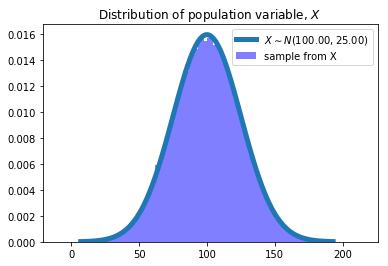

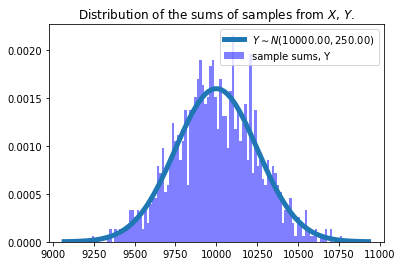

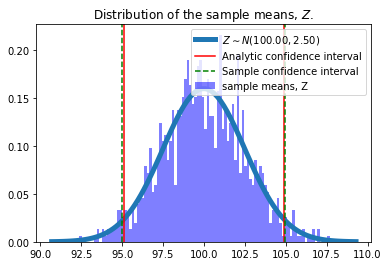

In [5]:
# Testing the above derivation via simulation.
m = 1000   # number of samples taken.
n = 100    # sample size.

# Define analytic parameters.
mu_X, sigma_X = 100, 25                            # Distribution of population, X.
mu_Y, sigma_Y = n * mu_X, np.sqrt(n * sigma_X**2)  # Distribution of sample sums, Y.
mu_Z, sigma_Z = mu_X, sigma_X / np.sqrt(n)         # Distribution of sample means, Z.

# Take m samples to get X.
sample = norm.rvs(mu_X, sigma_X, (m, n))
plt.hist(sample.ravel(), color='blue', alpha=0.5, density=True, label='sample from X', bins=100)
x = np.linspace(norm.ppf(1e-4, mu_X, sigma_X), norm.ppf(1-1e-4, mu_X, sigma_X), 100)
plt.plot(x, norm.pdf(x, mu_X, sigma_X), linewidth=5, 
         label='$X \sim N(%.2lf, %.2lf)$' % (mu_X, sigma_X))
plt.title('Distribution of population variable, $X$')
plt.legend()
plt.show()

# Sum each of the samples to get Y.
Y = sample.sum(axis=1)
plt.hist(Y, color='blue', alpha=0.5, density=True, label='sample sums, Y', bins=100)
x = np.linspace(norm.ppf(1e-4, mu_Y, sigma_Y), norm.ppf(1-1e-4, mu_Y, sigma_Y), 100)
plt.plot(x, norm.pdf(x, mu_Y, sigma_Y), linewidth=5, 
         label='$Y \sim N(%.2lf, %.2lf)$' % (mu_Y, sigma_Y))
plt.title('Distribution of the sums of samples from $X$, $Y$.')
plt.legend()
plt.show()

# Apply transformation a=1/n, b=0 to get Z.
Z = (1/n) * Y
plt.hist(Z, color='blue', bins=100, alpha=0.5, density=True, label='sample means, Z')
x = np.linspace(norm.ppf(1e-4, mu_Z, sigma_Z), norm.ppf(1-1e-4, mu_Z, sigma_Z), 100)
plt.plot(x, norm.pdf(x, mu_Z, sigma_Z), linewidth=5,
         label='$Z \sim N(%.2lf, %.2lf)$' % (mu_Z, sigma_Z))
CI95 = (norm.ppf(0.025, mu_Z, sigma_Z), norm.ppf(0.975, mu_Z, sigma_Z))
plt.axvline(CI95[0], color='red', label='Analytic confidence interval')
plt.axvline(CI95[1], color='red')
CI95 = (np.percentile(Z, 2.5), np.percentile(Z, 97.5))
plt.axvline(CI95[0], color='green', linestyle='--', label='Sample confidence interval')
plt.axvline(CI95[1], color='green', linestyle='--',)
plt.title('Distribution of the sample means, $Z$.')
plt.legend()
plt.show()

## Analytic methods

If we know the parameters of the sampling distribution, we can compute confidence intervals and p-values analytically, which is computationally faster than resampling.

In [6]:
def EvalNormalCdfInverse(p, mu=0, sigma=1):
    return scipy.stats.norm.ppf(p, loc=mu, scale=sigma)

Here's the confidence interval for the estimated mean.

In [7]:
EvalNormalCdfInverse(0.05, mu=90, sigma=2.5)

85.88786593262132

In [8]:
EvalNormalCdfInverse(0.95, mu=90, sigma=2.5)

94.11213406737868

`normal.py` provides a `Normal` class that encapsulates what we know about arithmetic operations on normal distributions.

In [9]:
# Continuing to use scipy.stats by itself.

## Central Limit Theorem

If you add up independent variates from a distribution with finite mean and variance, the sum converges on a normal distribution.

The following function generates samples with difference sizes from an exponential distribution.

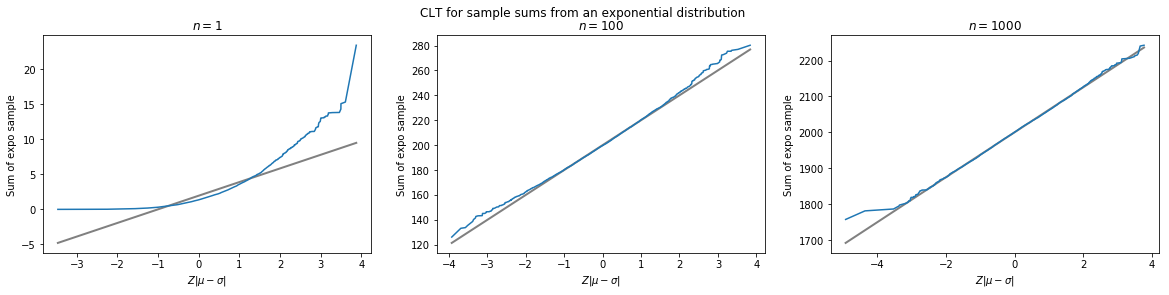

In [10]:
# Testing whether the sums of samples from an exponential distribution converge to a normal distribution.
N = [1, 100, 1000] # Sample sizes.
m = 10000          # Number of samples to take for each sample size.
beta = 2.0

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for ax, n in zip(axes, N):
    samples = np.random.exponential(beta, (m, n))
    X = np.random.normal(0, 1, m)
    Y = samples.sum(1)
    ax.plot([X.min(), X.max()], [X.min() * Y.std() + Y.mean(), X.max() * Y.std() + Y.mean()], 
            color='gray', linewidth=2)
    ax.plot(sorted(X), sorted(Y))
    ax.set_title('$n=%d$' % n)
    ax.set_ylabel('Sum of expo sample')
    ax.set_xlabel('$Z |\mu - \sigma|$')
plt.suptitle('CLT for sample sums from an exponential distribution')
plt.show()

The lognormal distribution has higher variance, so it requires a larger sample size before it converges to normal.

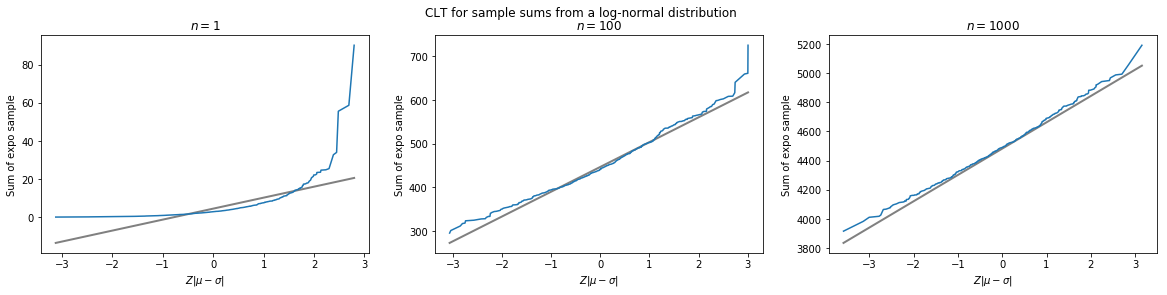

In [11]:
# Testing whether the sums of samples from a log-normal distribution converge to a normal distribution.
N = [1, 100, 1000] # Sample sizes.
m = 1000           # Number of samples to take for each sample size.
mu, sigma = 1, 1

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for ax, n in zip(axes, N):
    Y = np.random.lognormal(mu, sigma, (m, n)).sum(1)
    X = np.random.normal(0, 1, m)
    ax.plot([X.min(), X.max()], [X.min() * Y.std() + Y.mean(), X.max() * Y.std() + Y.mean()], 
            color='gray', linewidth=2)
    ax.plot(sorted(X), sorted(Y))
    ax.set_title('$n=%d$' % n)
    ax.set_ylabel('Sum of expo sample')
    ax.set_xlabel('$Z |\mu - \sigma|$')
plt.suptitle('CLT for sample sums from a log-normal distribution')
plt.show()

The Pareto distribution has infinite variance, and sometimes infinite mean, depending on the parameters.  It violates the requirements of the CLT and does not generally converge to normal.

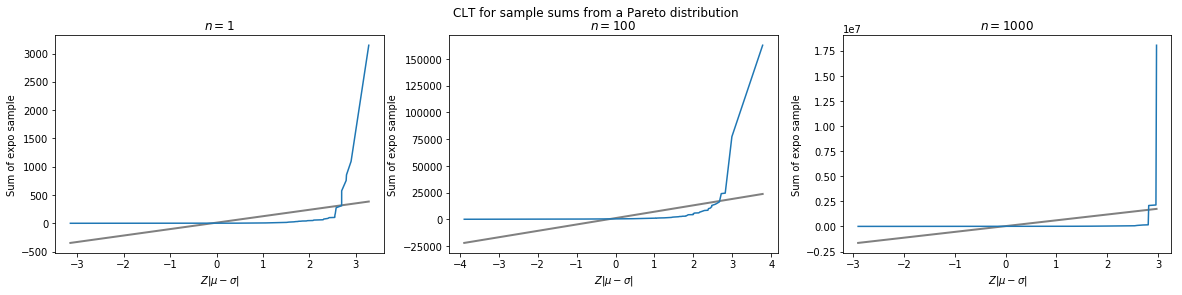

In [12]:
# Testing whether the sums of samples from a Pareto distribution converge to a normal distribution.
N = [1, 100, 1000] # Sample sizes.
m = 1000           # Number of samples to take for each sample size.
alpha = 1

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for ax, n in zip(axes, N):
    Y = np.random.pareto(alpha, (m, n)).sum(1)
    X = np.random.normal(0, 1, m)
    ax.plot([X.min(), X.max()], [X.min() * Y.std() + Y.mean(), X.max() * Y.std() + Y.mean()], 
            color='gray', linewidth=2)
    ax.plot(sorted(X), sorted(Y))
    ax.set_title('$n=%d$' % n)
    ax.set_ylabel('Sum of expo sample')
    ax.set_xlabel('$Z |\mu - \sigma|$')
plt.suptitle('CLT for sample sums from a Pareto distribution')
plt.show()

If the random variates are correlated, that also violates the CLT, so the sums don't generally converge.

To generate correlated values, we generate correlated normal values and then transform to whatever distribution we want.

In [13]:
def get_serial_correlated_values(rho, n):
    x = np.random.normal(0, 1)
    sigma = np.sqrt(1 - rho**2)
    vals = np.zeros(n, dtype=np.float32)
    for i in range(n):
        x = np.random.normal(x * rho, sigma)
        vals[i] = x
    return vals
        
values = get_serial_correlated_values(0.8, 1000)
mts.serial_correlation(values, lag=1)

0.8260879888037775

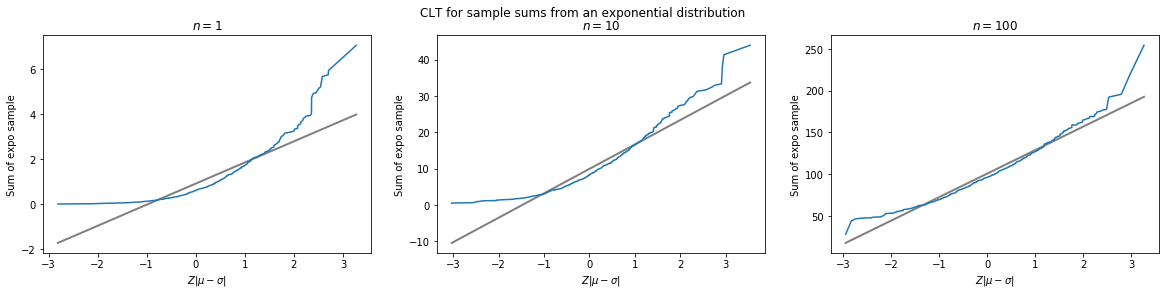

In [14]:
# Testing whether the sums of samples from an exponential distribution converge 
# to a normal distribution when the samples are serially correlated. It doesn't
# converge as nicely as the non-correlated samples, but it's still going in the
# right direction.
N = [1, 10, 100] # Sample sizes.
m = 1000         # Number of samples to take for each sample size.
beta = 2.0
rho = 0.8

fig, axes = plt.subplots(1, 3, figsize=(20, 4))
for ax, n in zip(axes, N):
    
    # Slightly more complicated to generate correlated samples.
    normal = get_serial_correlated_values(rho, m * n).reshape((m, n))
    uniform = scipy.stats.norm.cdf(normal)
    samples = scipy.stats.expon.ppf(uniform)
    
    X = np.random.normal(0, 1, m)
    Y = samples.sum(1)
    ax.plot([X.min(), X.max()], [X.min() * Y.std() + Y.mean(), X.max() * Y.std() + Y.mean()], 
            color='gray', linewidth=2)
    ax.plot(sorted(X), sorted(Y))
    ax.set_title('$n=%d$' % n)
    ax.set_ylabel('Sum of expo sample')
    ax.set_xlabel('$Z |\mu - \sigma|$')
plt.suptitle('CLT for sample sums from an exponential distribution')
plt.show()

## Difference in means

Let's use analytic methods to compute a CI and p-value for an observed difference in means.

The distribution of pregnancy length is not normal, but it has finite mean and variance, so the sum (or mean) of a few thousand samples is very close to normal.

In [15]:
preg = mts.nsfg_read_data('ThinkStats2/code/2002FemPreg.dct', 'ThinkStats2/code/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]
first = live[live.birthord == 1]
other = live[live.birthord > 1]
delta = first.prglngth.mean() - other.prglngth.mean()
delta

0.07803726677754952

The following function computes the sampling distribution of the mean for a set of values and a given sample size.

In [16]:
def analytic_sample_mean_params(population_values, sample_size):
    mean, std = population_values.mean(), population_values.std()
    mu_Y, sigma_Y = sample_size * mean, sqrt(sample_size * std**2)
    mu_Z, sigma_Z = mu_Y / sample_size, sigma_Y / sample_size
    return mu_Z, sigma_Z

Here are the sampling distributions for the means of the two groups under the null hypothesis.

In [17]:
mu_first, sigma_first = analytic_sample_mean_params(live.prglngth, len(first))
mu_other, sigma_other = analytic_sample_mean_params(live.prglngth, len(other))
(mu_first, sigma_first), (mu_other, sigma_other)

((38.56055968517709, 0.04067931566318466),
 (38.56055968517709, 0.039271782185087964))

And the sampling distribution for the difference in means.

In [18]:
# Tricky detail in that you subtract the means but add the standard deviations.
mu_diff = mu_first - mu_other
sigma_diff = sqrt(sigma_first**2 + sigma_other**2)
mu_diff, sigma_diff

(0.0, 0.0565427236593535)

Under the null hypothesis, here's the chance of exceeding the observed difference.

In [19]:
1 - norm.cdf(delta, mu_diff, sigma_diff)

0.08377070425543787

And the chance of falling below the negated difference.

In [20]:
norm.cdf(-1 * delta, mu_diff, sigma_diff)

0.08377070425543787

The sum of these probabilities is the two-sided p-value.

## Testing a correlation

Under the null hypothesis (that there is no correlation), the sampling distribution of the observed correlation (suitably transformed) is a "Student t" distribution.

In [21]:
# Compute the pearson correlation, r.
live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
X, Y = live2.agepreg.values, live2.totalwgt_lb.values
r = mts.pearson_correlation(X, Y)
print('Correlation(agepreg, totalwgt_lb) = %.3lf' % r)

Correlation(agepreg, totalwgt_lb) = 0.069


In [22]:
# Compute the test-statistic t and its p-value using Student-T CDF.
# I don't understand why Downey does all the other intermediate steps here.
# TODO: figure out why the Student-T distribution is used here. Maybe it's
# because its CDF can be computed analytically and the Normal cannot?
# TODO: figure out why t is computed by this equation.
df = len(live2) - 2
t = r * sqrt((n - 2) / (1 - r**2))
pval = 1 - scipy.stats.t.cdf(t, df=df)
print('P(r >= %.3lf) = %.11lf' % (r, pval))

P(r >= 0.069) = 0.24729902530


##  Chi-squared test

The reason the chi-squared statistic is useful is that we can compute its distribution under the null hypothesis analytically.

In [23]:
# Setup data for a fake set of dice rolls.
rolled = np.array([8, 9, 19, 5, 8, 11])
expect = np.ones(len(rolled)) * (sum(rolled) / 6)
rolled, expect

(array([ 8,  9, 19,  5,  8, 11]), array([10., 10., 10., 10., 10., 10.]))

In [24]:
# Compute the chi-squared statistic for the fake data.
rolled_chi2 = sum((rolled - expect)**2 / expect)
rolled_chi2

11.6

In [25]:
# Compute the p-value using a chi-squared distribution with the correct DoF.
n = len(rolled)
pval = 1 - scipy.stats.chi2.cdf(rolled_chi2, df=n-1)
print('P(chi2 >= %.1lf) = %.4lf' % (rolled_chi2, pval))

P(chi2 >= 11.6) = 0.0407


## Exercises

**Exercise:**    In Section 5.4, we saw that the distribution of adult weights is approximately lognormal. One possible explanation is that the weight a person gains each year is proportional to their current weight. In that case, adult weight is the product of a large number of multiplicative factors:

$w = w_0 \cdot f_1 \cdot f_2 \cdot ... f_n$  

where $w$ is adult weight, $w_0$ is birth weight, and $f_i$ is the weight gain factor for year $i$.

The log of a product is the sum of the logs of the factors:

$log w = log w_0 + log f_1 + log f_2 + ... + log f_n$ 

So by the Central Limit Theorem, the distribution of $log w$ is approximately normal for large $n$, which implies that the distribution of $w$ is lognormal.

To model this phenomenon, choose a distribution for $f$ that seems reasonable, then generate a sample of adult weights by choosing a random value from the distribution of birth weights, choosing a sequence of factors from the distribution of f, and computing the product. What value of $n$ is needed to converge to a lognormal distribution?

In [26]:
# Read the actual adult weights.
brfss = mts.brfss_read_data('ThinkStats2/code/CDBRFS08.ASC.gz')
adult_weights = brfss.wtkg2.dropna() * 2.205
adult_weights_pmf = adult_weights.value_counts(normalize=True)
adult_weights_cdf = mts.pmf_to_cdf(adult_weights_pmf)
adult_weights.mean()

174.17835885807207

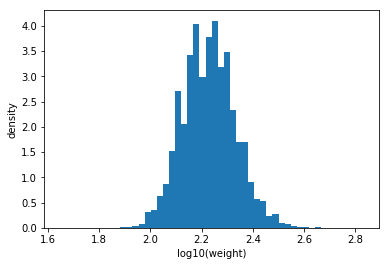

In [27]:
# If the logarithm of a set of values follow a normal distribution,
# then the set of values follows a lognormal distribution.
plt.hist(np.log10(adult_weights), bins=50, label='log10(weight)', density=True)
plt.xlabel('log10(weight)')
plt.ylabel('density')
plt.show()

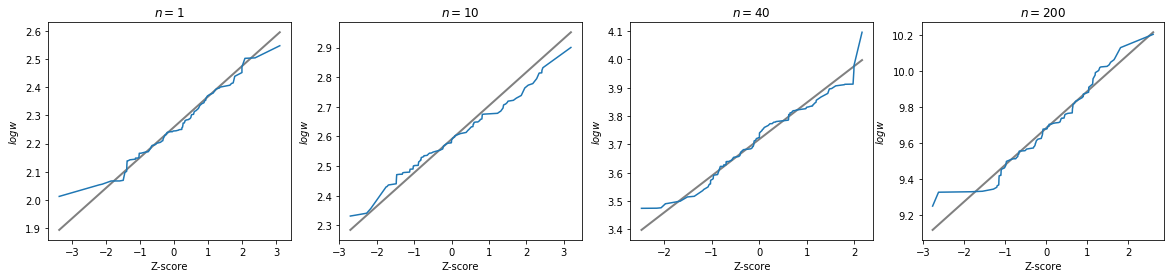

In [28]:
# log W = log10(adult_weights) = sum of logs of original weight and weight gain factors.
# log W converges to a normal distribution -> W follows a lognormal distribution.
# The factors hover around 1, meaning people neither gain nor lose much weight per interval.
# Show that log W converges to a normal distribution as n increases.

m = 100              # Number of people to sample.
N = [1, 10, 40, 200] # Number of factors for each person.

params_F = (1.09, 0.03) # Parameters for a Normal distribution of weight change factors..

W0 = adult_weights.sample(n=m, replace=True) # Starting weights for m people.

fig, axes = plt.subplots(1, len(N), figsize=(20, 4))

for ax, n in zip(axes, N):    
    F = np.random.normal(*params_F, size=(m, n))
    W = W0 * np.prod(F, axis=1)
    X = np.random.normal(0, 1, m)
    Y = np.log10(W)
    ax.plot([X.min(), X.max()], [X.min() * Y.std() + Y.mean(), X.max() * Y.std() + Y.mean()], 
            color='gray', linewidth=2)
    ax.plot(sorted(X), sorted(Y))
    ax.set_xlabel('Z-score')
    ax.set_ylabel('$log w$')
    ax.set_title('$n=%d$' % n)

**Exercise:** In Section 14.6 we used the Central Limit Theorem to find the sampling distribution of the difference in means, $\delta$, under the null hypothesis that both samples are drawn from the same population.

We can also use this distribution to find the standard error of the estimate and confidence intervals, but that would only be approximately correct. To be more precise, we should compute the sampling distribution of $\delta$ under the alternate hypothesis that the samples are drawn from different populations. 

Compute this distribution and use it to calculate the standard error and a 90% confidence interval for the difference in means.

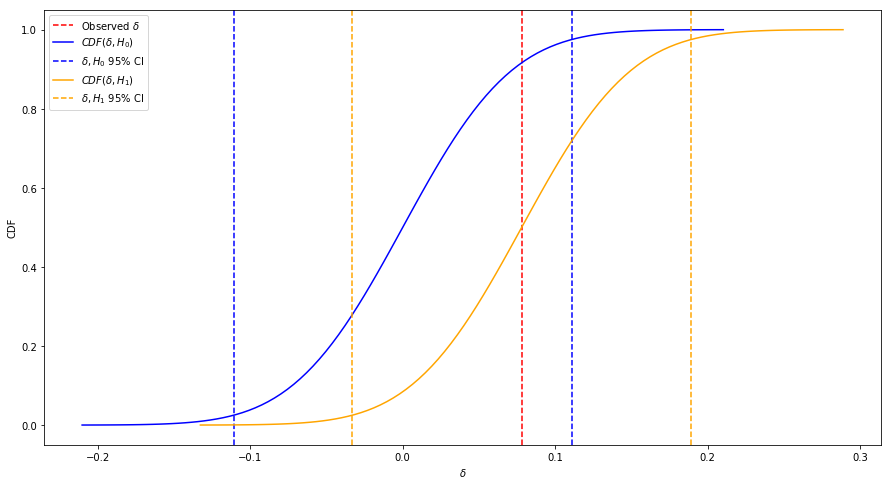

In [29]:
# The point of this exercise is to show that the observed delta falls right in the middle of the
# sampling distribution for the alternate hypothesis, and falls well to the right of the sampling
# distribution for the null hypothesis.
plt.figure(figsize=(15, 8))

# Compute and plot the observed delta.
delta = first.prglngth.mean() - other.prglngth.mean()
plt.axvline(delta, color='red', label='Observed $\delta$', linestyle='--')

# Under the Null hypothesis, first and other are samples from the same population.
mu_first, sigma_first = analytic_sample_mean_params(live.prglngth, len(first))
mu_other, sigma_other = analytic_sample_mean_params(live.prglngth, len(other))

# Subtract the sampling distribution for others from the sampling distribution for firsts.
mu_delta = mu_first - mu_other
sigma_delta = sqrt(sigma_first**2 + sigma_other**2)

# Plot the CDF for the null hypothesis and it's confidence interval.
x = np.linspace(norm.ppf(1e-4, mu_delta, sigma_delta), norm.ppf(1 - 1e-4, mu_delta, sigma_delta), 101)
plt.plot(x, norm.cdf(x, mu_delta, sigma_delta), label='${CDF}(\delta, H_0)$', color='blue')
plt.axvline(norm.ppf(0.025, mu_delta, sigma_delta), color='blue', linestyle='--', label='$\delta, H_0$ 95% CI')
plt.axvline(norm.ppf(0.975, mu_delta, sigma_delta), color='blue', linestyle='--')

# Under the alternate hypothesis, first and other are samples from two distinct populations.
mu_first, sigma_first = analytic_sample_mean_params(first.prglngth, len(first))
mu_other, sigma_other = analytic_sample_mean_params(other.prglngth, len(other))

# Subtract the sampling distributions again.
mu_delta = mu_first - mu_other
sigma_delta = sqrt(sigma_first**2 + sigma_other**2)
x = np.linspace(norm.ppf(1e-4, mu_delta, sigma_delta), norm.ppf(1 - 1e-4, mu_delta, sigma_delta), 101)
plt.plot(x, norm.cdf(x, mu_delta, sigma_delta), label='${CDF}(\delta, H_1)$', color='orange')
plt.axvline(norm.ppf(0.025, mu_delta, sigma_delta), color='orange', linestyle='--', label='$\delta, H_1$ 95% CI')
plt.axvline(norm.ppf(0.975, mu_delta, sigma_delta), color='orange', linestyle='--')

plt.ylabel('CDF')
plt.xlabel('$\delta$')
plt.legend()
plt.show()

**Exercise:** [In a recent paper](http://ieeexplore.ieee.org/document/7044435/), Stein et al. investigate the effects of an intervention intended to mitigate gender-stereotypical task allocation within student engineering teams.

Before and after the intervention, students responded to a survey that asked them to rate their contribution to each aspect of class projects on a 7-point scale.

Before the intervention, male students reported higher scores for the programming aspect of the project than female students; on average men reported a score of 3.57 with standard error 0.28. Women reported 1.91, on average, with standard error 0.32.

Compute the sampling distribution of the gender gap (the difference in means), and test whether it is statistically significant. Because you are given standard errors for the estimated means, you don’t need to know the sample size to figure out the sampling distributions.

After the intervention, the gender gap was smaller: the average score for men was 3.44 (SE 0.16); the average score for women was 3.18 (SE 0.16). Again, compute the sampling distribution of the gender gap and test it.

Finally, estimate the change in gender gap; what is the sampling distribution of this change, and is it statistically significant?

In [30]:
# Compute the sampling distribution of the gender gap before intervention.
mu_F, sigma_F = 1.91, 0.32
mu_M, sigma_M = 3.57, 0.28
mu_D = mu_F - mu_M
sigma_D = sqrt(sigma_M**2 + sigma_F**2)
print('M ~ N(%.2lf, %.2lf)' % (mu_M, sigma_M))
print('F ~ N(%.2lf, %.2lf)' % (mu_F, sigma_F))
print('D ~ N(%.2lf, %.2lf)' % (mu_D, sigma_D))

# Since we only know the distribution parameters for male and females separately, the test is tricky to formulate.
# P-value is the probability of delta = 0.
pval = 1 - norm.cdf(0, mu_D, sigma_D)
print('P(delta = 0) = %.6lf' % (pval))

M ~ N(3.57, 0.28)
F ~ N(1.91, 0.32)
D ~ N(-1.66, 0.43)
P(delta = 0) = 0.000047


In [31]:
# Repeat for distributions after the intervention.
mu_F, sigma_F = 3.18, 0.16
mu_M, sigma_M = 3.44, 0.16
mu_D = mu_F - mu_M
sigma_D = sqrt(sigma_M**2 + sigma_F**2)
print('M ~ N(%.2lf, %.2lf)' % (mu_M, sigma_M))
print('F ~ N(%.2lf, %.2lf)' % (mu_F, sigma_F))
print('D ~ N(%.2lf, %.2lf)' % (mu_D, sigma_D))

pval = 1 - norm.cdf(0, mu_D, sigma_D)
print('P(delta = 0) = %.6lf' % (pval))

M ~ N(3.44, 0.16)
F ~ N(3.18, 0.16)
D ~ N(-0.26, 0.23)
P(delta = 0) = 0.125268


In [32]:
# Conclusion:
# In the first hypothesis test, it's highly unlikely that the scores come from the same distribution.
# In the second hypothesis test, it's much more likely.

In [33]:
print('Done')

Done
